# Access Dataframe

In [1]:
# So stupid but you have to add CS4641 folder as shortcut in personal drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

import os

In [3]:
df = pd.read_csv('/content/drive/My Drive/CS 4641/preprocessed data/df_full.csv')
df

,Patient Number,Recording Index,Chest Location,Acquisition Mode,Recording Equipment,File Name,Waveform Plot Filename,Age,Sex,Adult BMI (kg/m2),Child Weight (kg),Child Height (cm),Diagnosis
0,226,1b1,Pl,sc,LittC2SE,226_1b1_Pl_sc_LittC2SE.wav,waveform_images/226_1b1_waveform.png,4.00,M,NaN,16.7,103.0,Pneumonia
1,226,1b1,Ll,sc,Meditron,226_1b1_Ll_sc_Meditron.wav,waveform_images/226_1b1_waveform.png,4.00,M,NaN,16.7,103.0,Pneumonia
2,226,1b1,Al,sc,Meditron,226_1b1_Al_sc_Meditron.wav,waveform_images/226_1b1_waveform.png,4.00,M,NaN,16.7,103.0,Pneumonia
3,221,2b3,Pr,mc,LittC2SE,221_2b3_Pr_mc_LittC2SE.wav,waveform_images/221_2b3_waveform.png,74.00,F,29.0,NaN,NaN,COPD
4,221,2b3,Lr,mc,LittC2SE,221_2b3_Lr_mc_LittC2SE.wav,waveform_images/221_2b3_waveform.png,74.00,F,29.0,NaN,NaN,COPD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,105,1b1,Tc,sc,Meditron,105_1b1_Tc_sc_Meditron.wav,waveform_images/105_1b1_waveform.png,7.00,F,NaN,32.0,135.0,URTI
917,103,2b2,Ar,mc,LittC2SE,103_2b2_Ar_mc_LittC2SE.wav,waveform_images/103_2b2_waveform.png,70.00,F,33.0,NaN,NaN,Asthma
918,102,1b1,Ar,sc,Meditron,102_1b1_Ar_sc_Meditron.wav,waveform_images/102_1b1_waveform.png,0.75,F,NaN,9.8,73.0,Healthy
919,101,1b1,Pr,sc,Meditron,101_1b1_Pr_sc_Meditron.wav,waveform_images/101_1b1_waveform.png,3.00,F,NaN,19.0,99.0,URTI


In [4]:
from PIL import Image
from IPython.display import display
import os

png_files = df['Waveform Plot Filename']
png_files

def get_image_path(file_name):
    file_name = file_name.replace("waveform_images/", "")
    # print(file_name)
    image_path = f'/content/drive/My Drive/CS 4641/preprocessed data/waveform images/{file_name}'
    return image_path


def show_image(file_name):
    image_path = get_image_path(file_name)
    if os.path.exists(image_path):
        # display(Image.open(image_path))
        return Image.open(image_path)
    else:
        print(file_name, "not found.")


In [5]:
df.iloc[0]

Patient Number                                             226
Recording Index                                            1b1
Chest Location                                              Pl
Acquisition Mode                                            sc
Recording Equipment                                   LittC2SE
File Name                           226_1b1_Pl_sc_LittC2SE.wav
Waveform Plot Filename    waveform_images/226_1b1_waveform.png
Age                                                        4.0
Sex                                                          M
Adult BMI (kg/m2)                                          NaN
Child Weight (kg)                                         16.7
Child Height (cm)                                        103.0
Diagnosis                                            Pneumonia
Name: 0, dtype: object

In [6]:
# # audio files are located
# folder_id_audio = '1L8xV8nbIeaTlPzgGfUtlRTs0VSHQqNO9'  # Replace with your actual folder ID
# file_list_audio = drive.ListFile({'q': f"'{folder_id_audio}' in parents and trashed=false"}).GetList()
import IPython
!pip install pydub

from pydub import AudioSegment
from pydub.playback import play

def get_audio_path(file_name):
    # df.head()
    # print(file_name)
    image_path = f'/content/drive/MyDrive/CS 4641/Dataset Files/Respiratory_Sound_Database/audio_and_txt_files/audio/{file_name}'
    return image_path

def get_audio(file_name):
    image_path = get_audio_path(file_name)
    if os.path.exists(image_path):
        IPython.display.Audio(image_path)
        # return Image.open(image_path)
        audio = AudioSegment.from_file(image_path, format="wav")
        play(audio)
        # print(image_path)
    else:
        print(file_name, "not found.")

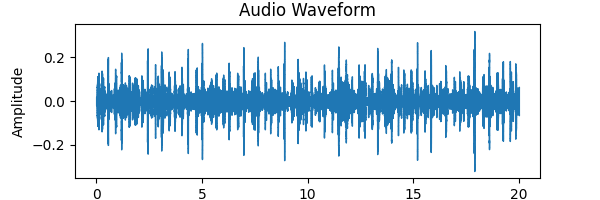

In [7]:
show_image(png_files[1])

In [8]:
get_audio(df.iloc[0]['File Name'])

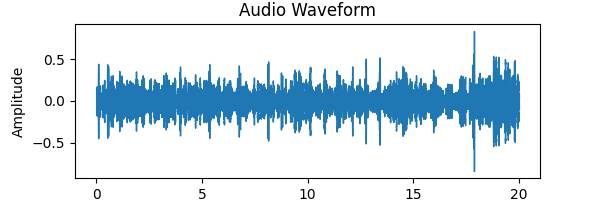

In [9]:
show_image(png_files[10])


In [10]:
print(df.dtypes)

Patient Number              int64
Recording Index            object
Chest Location             object
Acquisition Mode           object
Recording Equipment        object
File Name                  object
Waveform Plot Filename     object
Age                       float64
Sex                        object
Adult BMI (kg/m2)         float64
Child Weight (kg)         float64
Child Height (cm)         float64
Diagnosis                  object
dtype: object


In [ ]:
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']


In [15]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from pydub import AudioSegment
from pydub.playback import play

# Load your dataframe
# Assuming 'Diagnosis' is your target variable
# Drop non-numeric or irrelevant columns for simplicity
features = df.drop(['Recording Index', 'File Name', 'Waveform Plot Filename'], axis=1)

# Handle missing values if needed
features.fillna(0, inplace=True)

# Clean the 'Sex' column by replacing '0' with 'Unknown'
features['Sex'] = features['Sex'].replace(0, 'Unknown')

# Convert categorical variables to numerical representations
label_encoder = LabelEncoder()
print("Unique values in 'Sex' before encoding:", features['Sex'].unique())
features['Sex'] = label_encoder.fit_transform(features['Sex'])
print("Unique values in 'Sex' after encoding:", features['Sex'].unique())

# Use one-hot encoding for categorical variables with more than two categories
features = pd.get_dummies(features, columns=['Chest Location', 'Acquisition Mode', 'Recording Equipment'])

features['Diagnosis'] = label_encoder.fit_transform(features['Diagnosis'])

# Extract features and target variable
X = features.drop('Diagnosis', axis=1)
y = features['Diagnosis']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model (Decision Tree Classifier in this case)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_rep)
# Example of using the model with an audio file
sample_audio_file = df.iloc[0]['File Name']

# Assuming you have a function get_audio_path that returns the path to the audio file
audio_path = get_audio_path(sample_audio_file)

# Check if the audio file exists
if os.path.exists(audio_path):
    audio_features = X.loc[df['File Name'] == sample_audio_file].values.reshape(1, -1)
    predicted_diagnosis = model.predict(audio_features)
    print(f"Predicted Diagnosis for {sample_audio_file}: {predicted_diagnosis}")
    get_audio(sample_audio_file)
else:
    print(f"{sample_audio_file} not found.")


Unique values in 'Sex' before encoding: ['M' 'F' 'Unknown']
Unique values in 'Sex' after encoding: [1 0 2]
Accuracy: 0.9351351351351351
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.29      1.00      0.44         2
           3       1.00      0.99      0.99       156
           4       0.64      0.64      0.64        11
           6       0.78      1.00      0.88         7
           7       0.50      0.14      0.22         7

    accuracy                           0.94       185
   macro avg       0.70      0.79      0.70       185
weighted avg       0.94      0.94      0.93       185

Predicted Diagnosis for 226_1b1_Pl_sc_LittC2SE.wav: [6]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


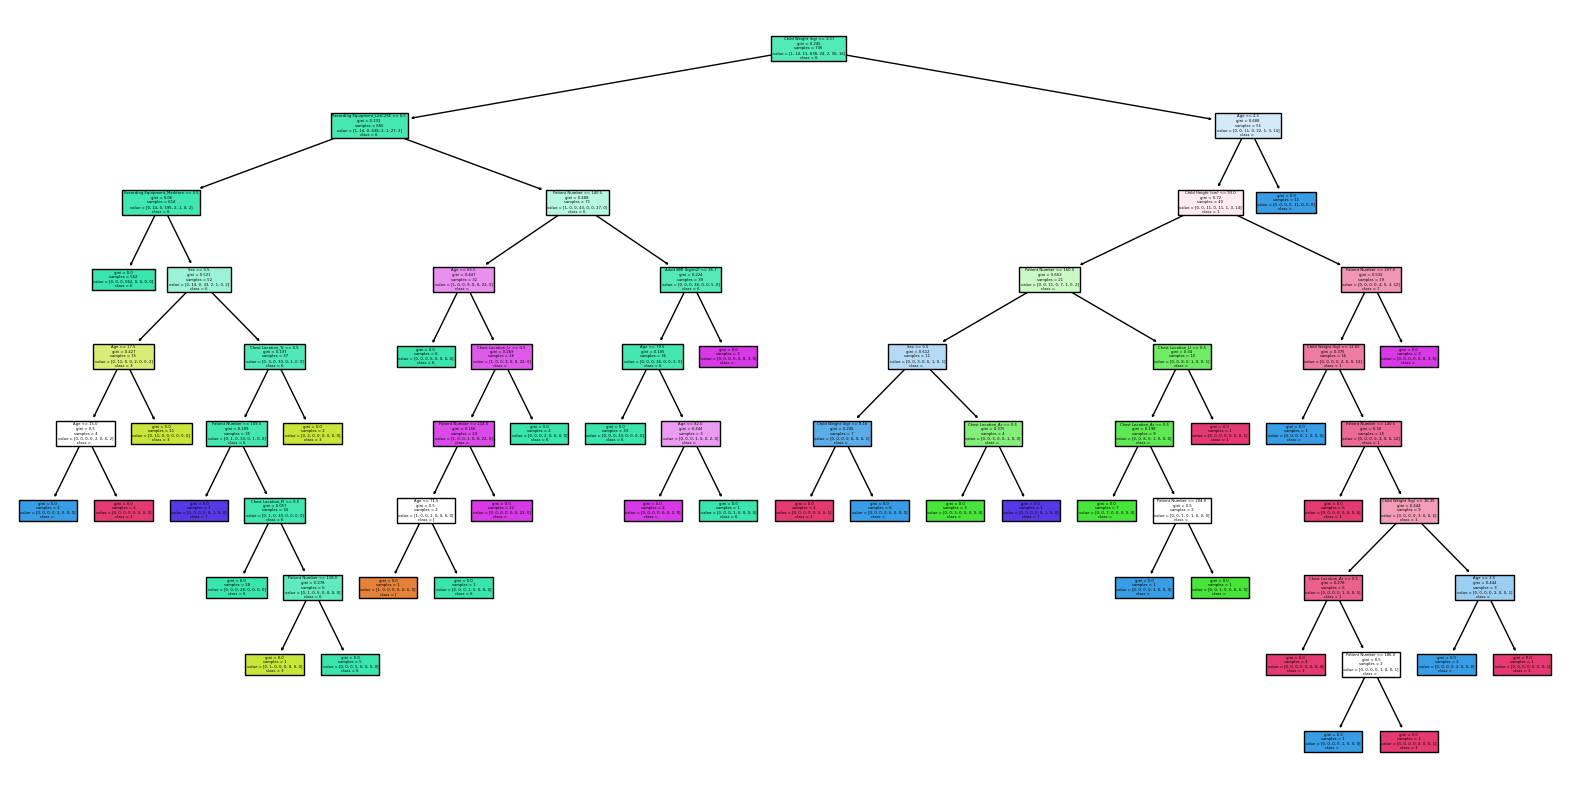

In [24]:
from sklearn.tree import plot_tree

# Fit the decision tree model
model.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X_train.columns, class_names=str(y_train.unique()))
plt.show()
